<a href="https://colab.research.google.com/github/nathaliemondoukpe12/app_gest_task/blob/main/traitementDonnee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chargement et exploration initiale

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/diabetes.csv')

 Analyse descriptive des variables numériques

In [ ]:
data.head()         # afficher les premières lignes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()         # type de colonnes et valeurs manquantes




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()      # statistiques descriptives pour les colonnes numériques


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Outcome'].value_counts()  # distribution catégorielle

,count
Outcome,
0,500
1,268


In [ ]:
print(data[['Age','BMI','BloodPressure']].describe())

              Age         BMI  BloodPressure
count  768.000000  768.000000     768.000000
mean    33.240885   31.992578      69.105469
std     11.760232    7.884160      19.355807
min     21.000000    0.000000       0.000000
25%     24.000000   27.300000      62.000000
50%     29.000000   32.000000      72.000000
75%     41.000000   36.600000      80.000000
max     81.000000   67.100000     122.000000


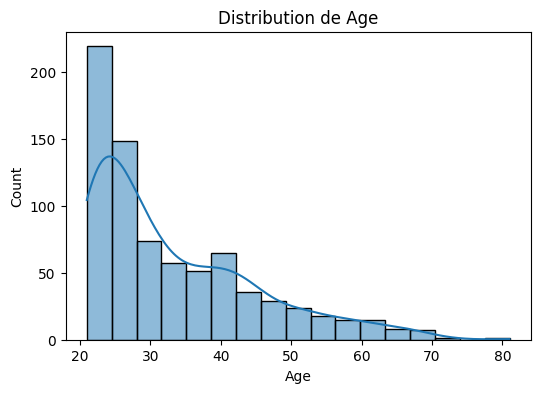

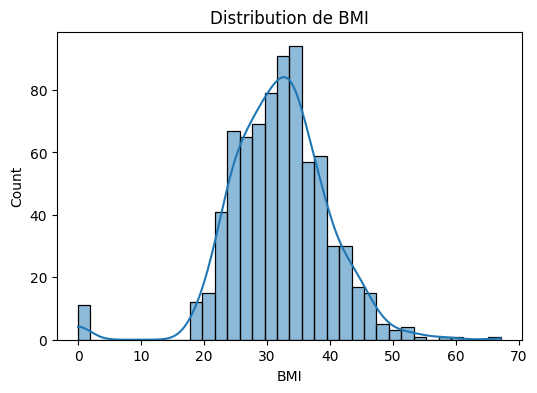

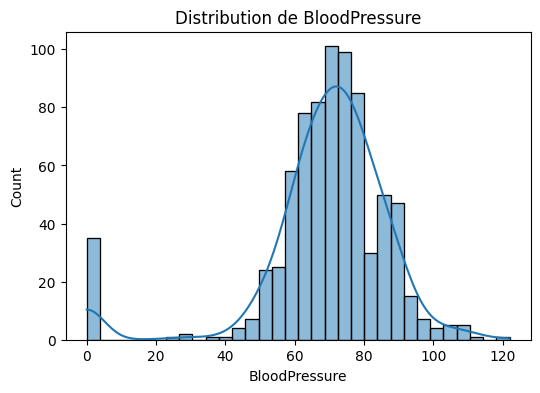

In [ ]:
numeric_cols = ['Age','BMI','BloodPressure']
for col in numeric_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(data[col] , kde=True)
  plt.title(f'Distribution de {col}')
  plt.show()


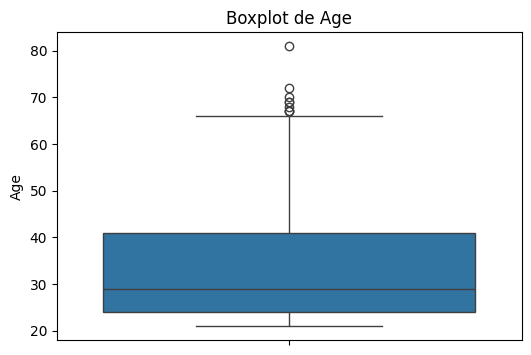

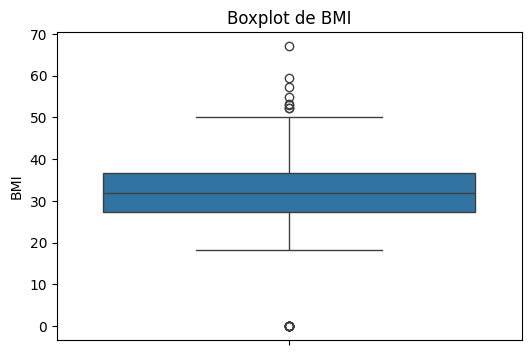

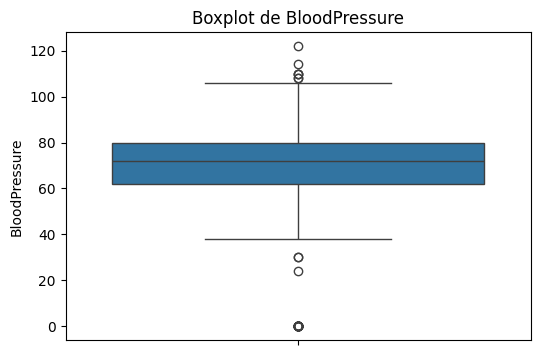

In [ ]:
for col in numeric_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(data[col])
  plt.title(f'Boxplot de {col}')
  plt.show()

Analyse descriptive des variables catégorielles

In [ ]:
categorical_cols = ['Outcome']

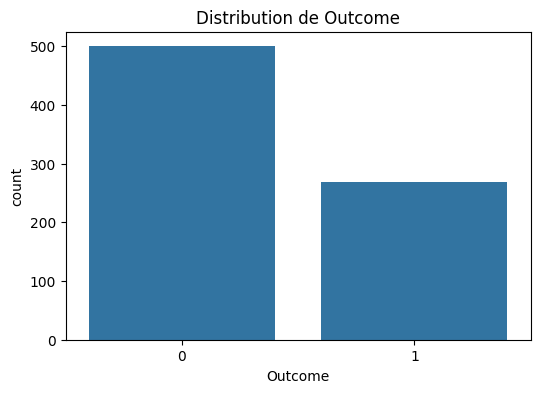

In [ ]:
for col in categorical_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(data=data, x=col)
  plt.title(f'Distribution de {col}')
  plt.show()

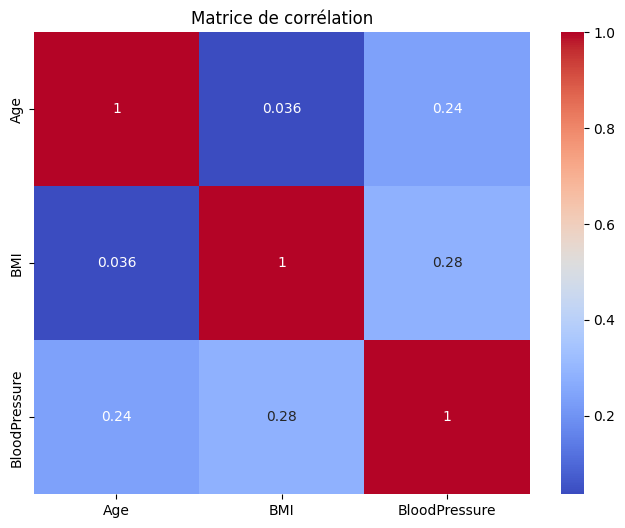

In [ ]:
corr = data[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

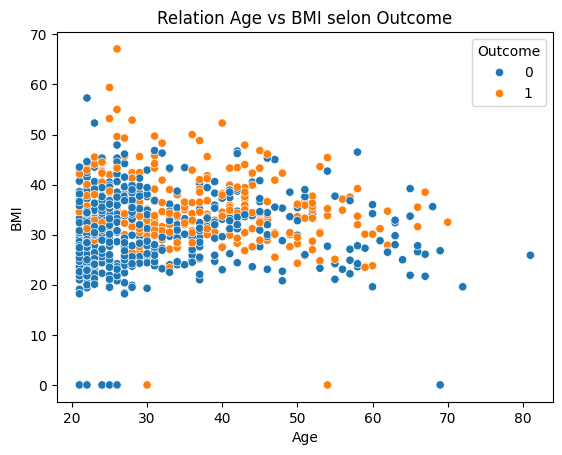

In [ ]:
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=data)
plt.title('Relation Age vs BMI selon Outcome')
plt.show()

Analyse des valeurs manquantes

Valeurs manquantes par colonne :
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


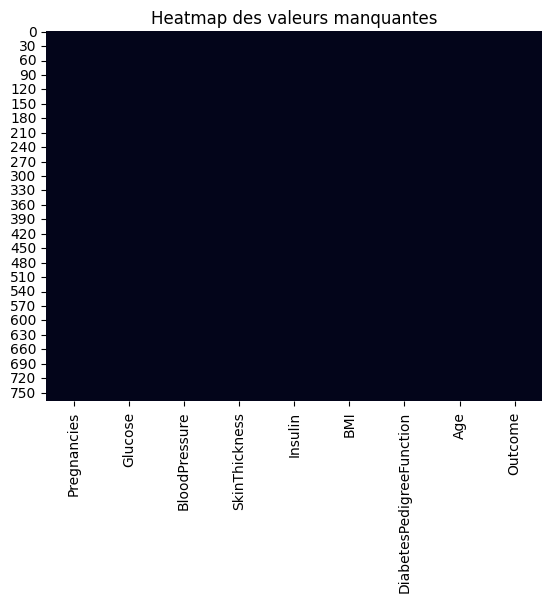

In [ ]:
missing = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing)
sns.heatmap(data.isnull(), cbar=False)
plt.title('Heatmap des valeurs manquantes')
plt.show()

In [ ]:
variability = data.std().sort_values(ascending=False)
print("Variabilité des variables (écart-type):")
print(variability)

Variabilité des variables (écart-type):
Insulin                     115.244002
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Age                          11.760232
BMI                           7.884160
Pregnancies                   3.369578
Outcome                       0.476951
DiabetesPedigreeFunction      0.331329
dtype: float64


In [ ]:
print("Détection des valeurs aberrantes (outliers) via la méthode IQR :\n")

for col in data.select_dtypes(include=np.number).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    num_outliers = len(outliers)

    if num_outliers > 0:
        print(f"Colonne '{col}': {num_outliers} valeurs aberrantes détectées.")
        print(f"  Valeurs minimales aberrantes: {outliers[outliers[col] < lower_bound][col].values}")
        print(f"  Valeurs maximales aberrantes: {outliers[outliers[col] > upper_bound][col].values}\n")
    else:
        print(f"Colonne '{col}': Aucune valeur aberrante détectée.\n")

Détection des valeurs aberrantes (outliers) via la méthode IQR :

Colonne 'Pregnancies': 4 valeurs aberrantes détectées.
  Valeurs minimales aberrantes: []
  Valeurs maximales aberrantes: [15 17 14 14]

Colonne 'Glucose': 5 valeurs aberrantes détectées.
  Valeurs minimales aberrantes: [0 0 0 0 0]
  Valeurs maximales aberrantes: []

Colonne 'BloodPressure': 45 valeurs aberrantes détectées.
  Valeurs minimales aberrantes: [ 0  0 30  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 24  0  0  0  0  0  0  0]
  Valeurs maximales aberrantes: [110 108 122 110 108 110 114]

Colonne 'SkinThickness': 1 valeurs aberrantes détectées.
  Valeurs minimales aberrantes: []
  Valeurs maximales aberrantes: [99]

Colonne 'Insulin': 34 valeurs aberrantes détectées.
  Valeurs minimales aberrantes: []
  Valeurs maximales aberrantes: [543 846 342 495 325 485 495 478 744 370 680 402 375 545 360 325 465 325
 415 579 474 328 480 326 330 600 321 440 540 480 335 387 392 510]

Colonne

In [ ]:
# Calculer des mesures de tendance centrale et de dispersion par catégorie.

numeric_features = data.select_dtypes(include=np.number).columns.drop('Outcome')

# Calculate mean, median, and standard deviation grouped by 'Outcome'
mean_by_outcome = data.groupby('Outcome')[numeric_features].mean()
median_by_outcome = data.groupby('Outcome')[numeric_features].median()
std_by_outcome = data.groupby('Outcome')[numeric_features].std()

print("\nMoyenne par Outcome:\n", mean_by_outcome)
print("\nMédiane par Outcome:\n", median_by_outcome)
print("\nÉcart-type par Outcome:\n", std_by_outcome)


Moyenne par Outcome:
          Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  

Médiane par Outcome:
          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Outcome                                                                       
0                2.0    107.0           70.0           21.0     39.0  30.05   
1                4.0    140.0           74.0           27.0      0.0  34.25   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0       

## Violin Plots par `Outcome`

Les violin plots sont utiles pour visualiser la distribution (densité) de plusieurs variables numériques par rapport à une variable catégorielle (ici, `Outcome`).

/tmp/ipython-input-1563223863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')
/tmp/ipython-input-1563223863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')
/tmp/ipython-input-1563223863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')
/tmp/ipython-input-1563223863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

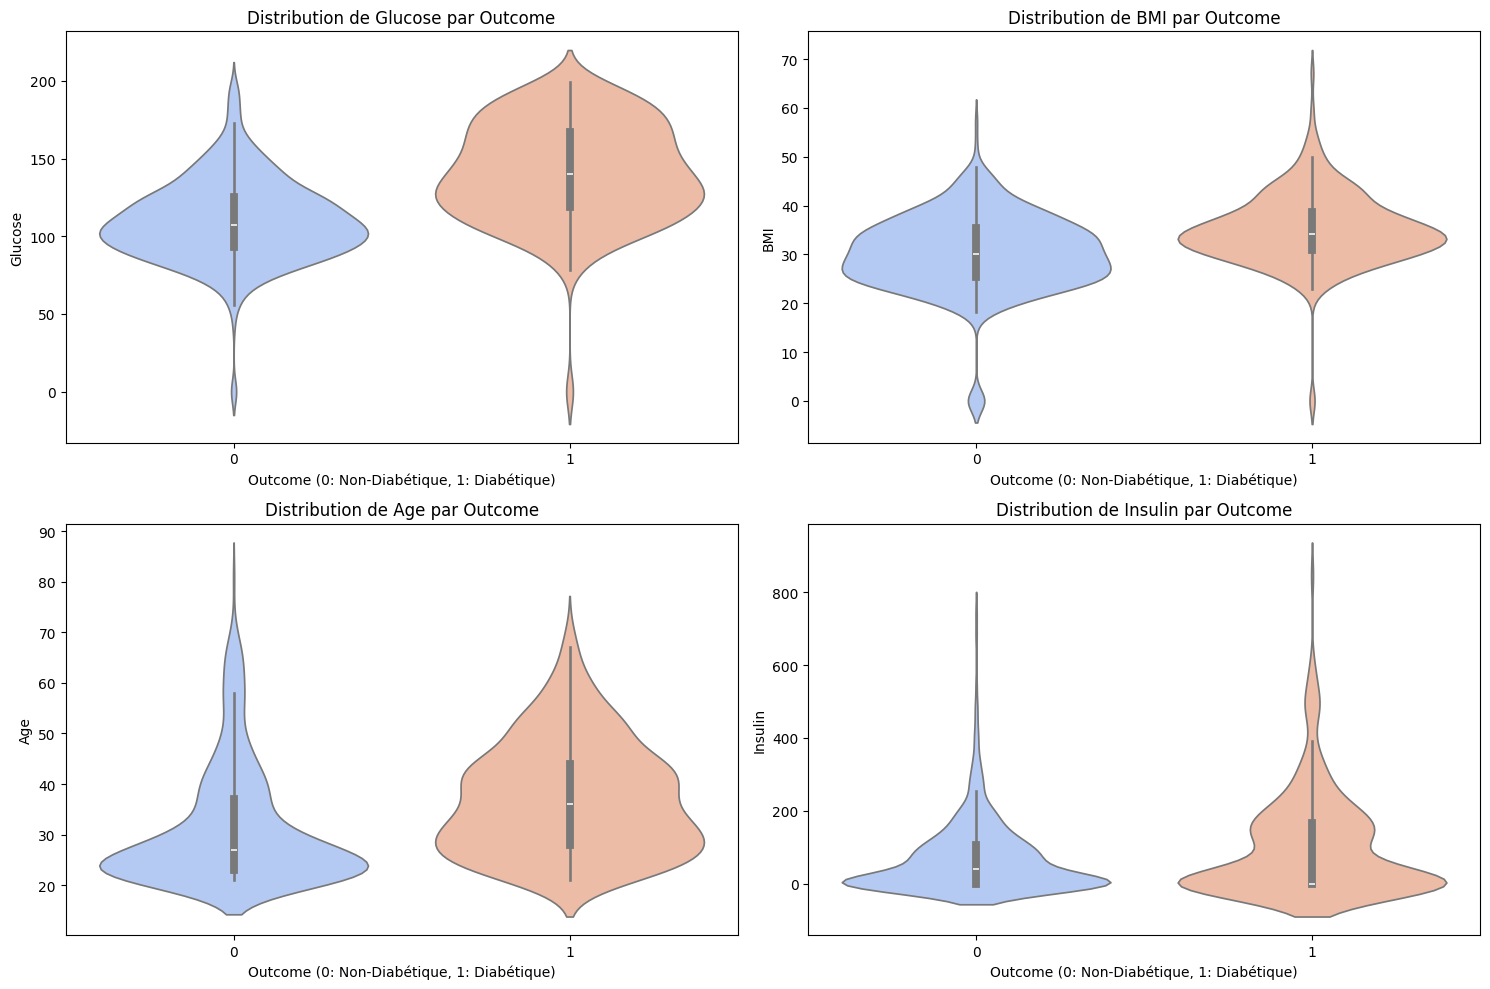

In [ ]:
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin']

plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)  # 2 lignes, 2 colonnes pour les subplots
    sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')
    plt.title(f'Distribution de {col} par Outcome')
    plt.xlabel('Outcome (0: Non-Diabétique, 1: Diabétique)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Boxplots Groupés par `Outcome`

Les boxplots groupés sont similaires mais mettent davantage l'accent sur les quartiles, la médiane et les valeurs aberrantes pour chaque groupe.

/tmp/ipython-input-3172759860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=data, palette='viridis')
/tmp/ipython-input-3172759860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=data, palette='viridis')
/tmp/ipython-input-3172759860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=data, palette='viridis')
/tmp/ipython-input-3172759860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

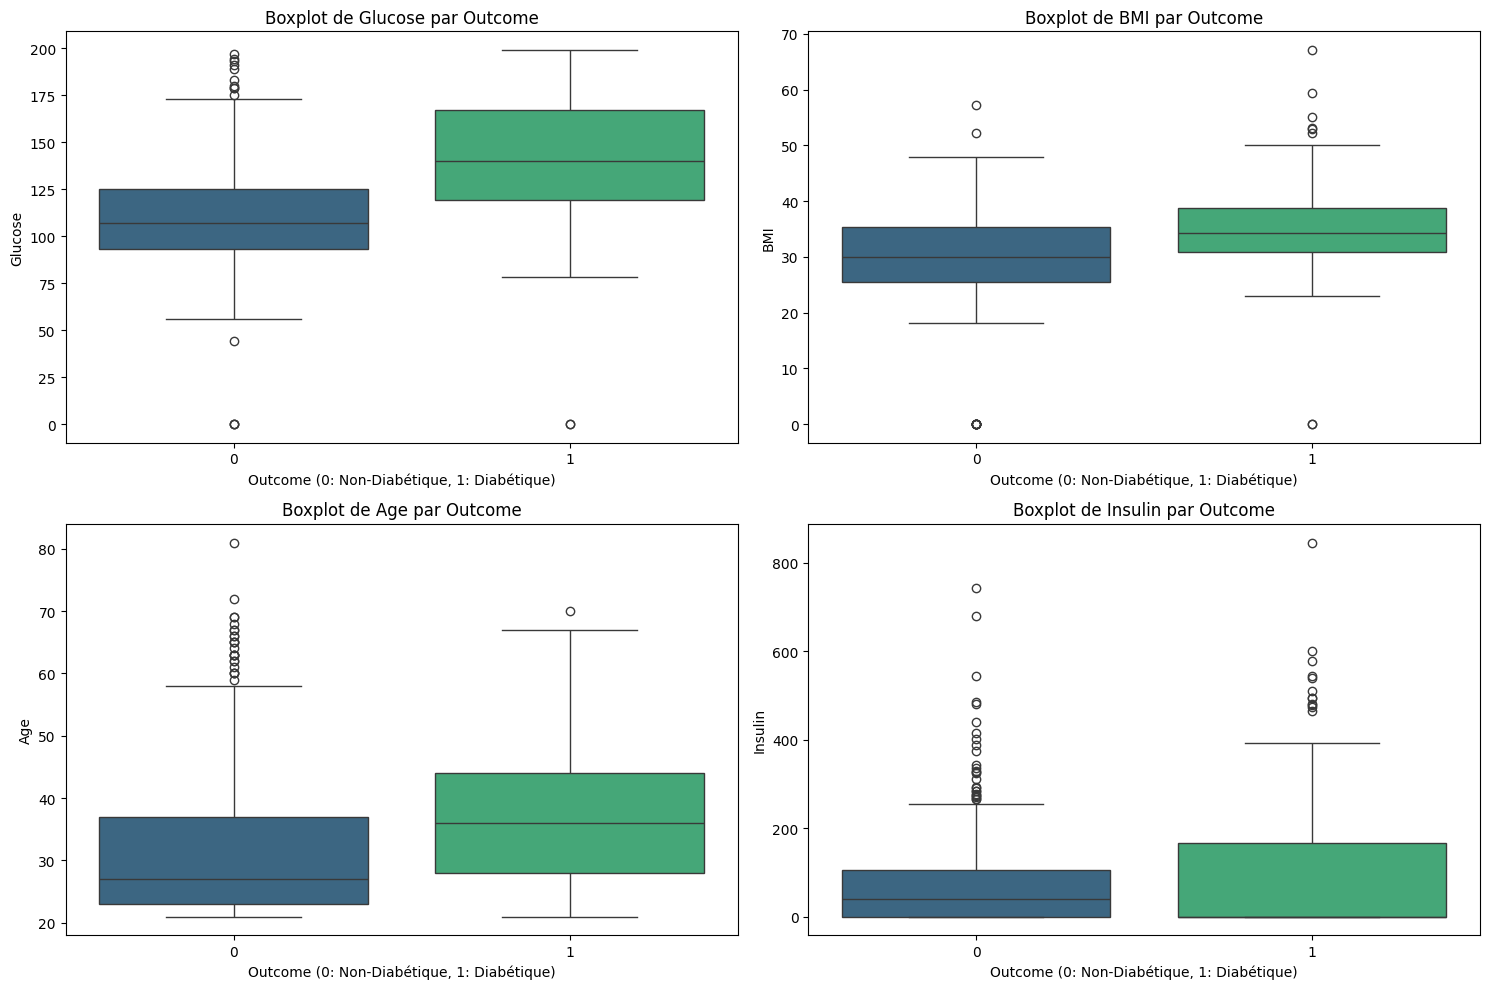

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Outcome', y=col, data=data, palette='viridis')
    plt.title(f'Boxplot de {col} par Outcome')
    plt.xlabel('Outcome (0: Non-Diabétique, 1: Diabétique)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Pairplot des Relations entre Variables Numériques (coloré par `Outcome`)

Un pairplot est un excellent moyen de visualiser les relations par paires entre plusieurs variables numériques, en affichant également les distributions individuelles. La coloration par `Outcome` permet de voir comment ces relations diffèrent entre les groupes.

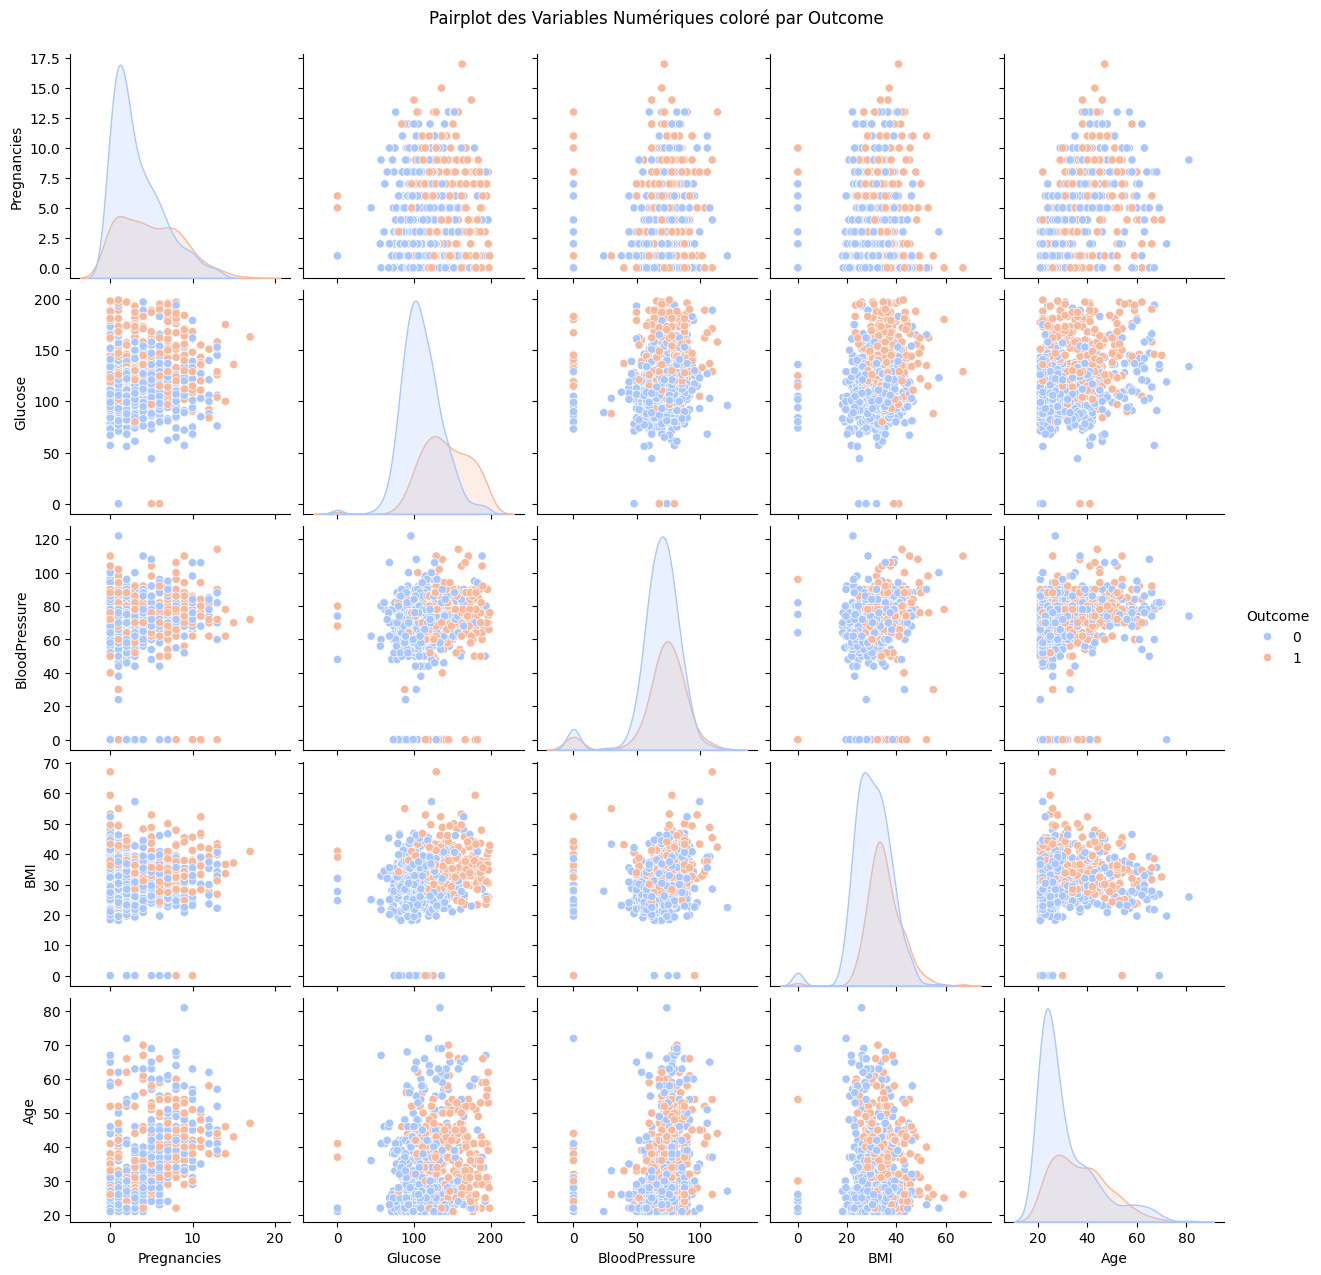

In [ ]:
# On va inclure plus de variables pour le pairplot pour une vue plus complète
pairplot_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']
sns.pairplot(data[pairplot_features], hue='Outcome', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot des Variables Numériques coloré par Outcome', y=1.02) # Ajuste le titre pour ne pas chevaucher
plt.show()